# Introduction

> Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.

Use the Credit Score Classification dataset provided [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) to train and test your design.

**Notes:**
- Split the data as you see fit and use validation during training.
- You may re-use the EDA, data preparation, and other sections you previously used in ML1 assignemnts.
- Remember that you can use classification metrics from other libraries as well (e.g., `sklearn`)
- Plot the loss, and accuracy against epochs and extract insights on how well of a fit your model is.
- This time the notebook is not prepared with sections and instructions so that you can do it yourself.
- If you are stuck, you can consult the [Keras User Guide](https://keras.io/api/). There are some useful [Code Examples](https://keras.io/examples/) as well.


# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Input
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.utils import set_random_seed

In [2]:
set_random_seed(1123)

In [3]:
train = pd.read_csv('train.csv')

C:\Users\abdal\AppData\Local\Temp\ipykernel_23928\2949129822.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


# Exploratory Data Analysis (EDA)

## Simple Analysis

In [4]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
train.shape

(100000, 28)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
train.duplicated().sum()

np.int64(0)

# Visual Analysis

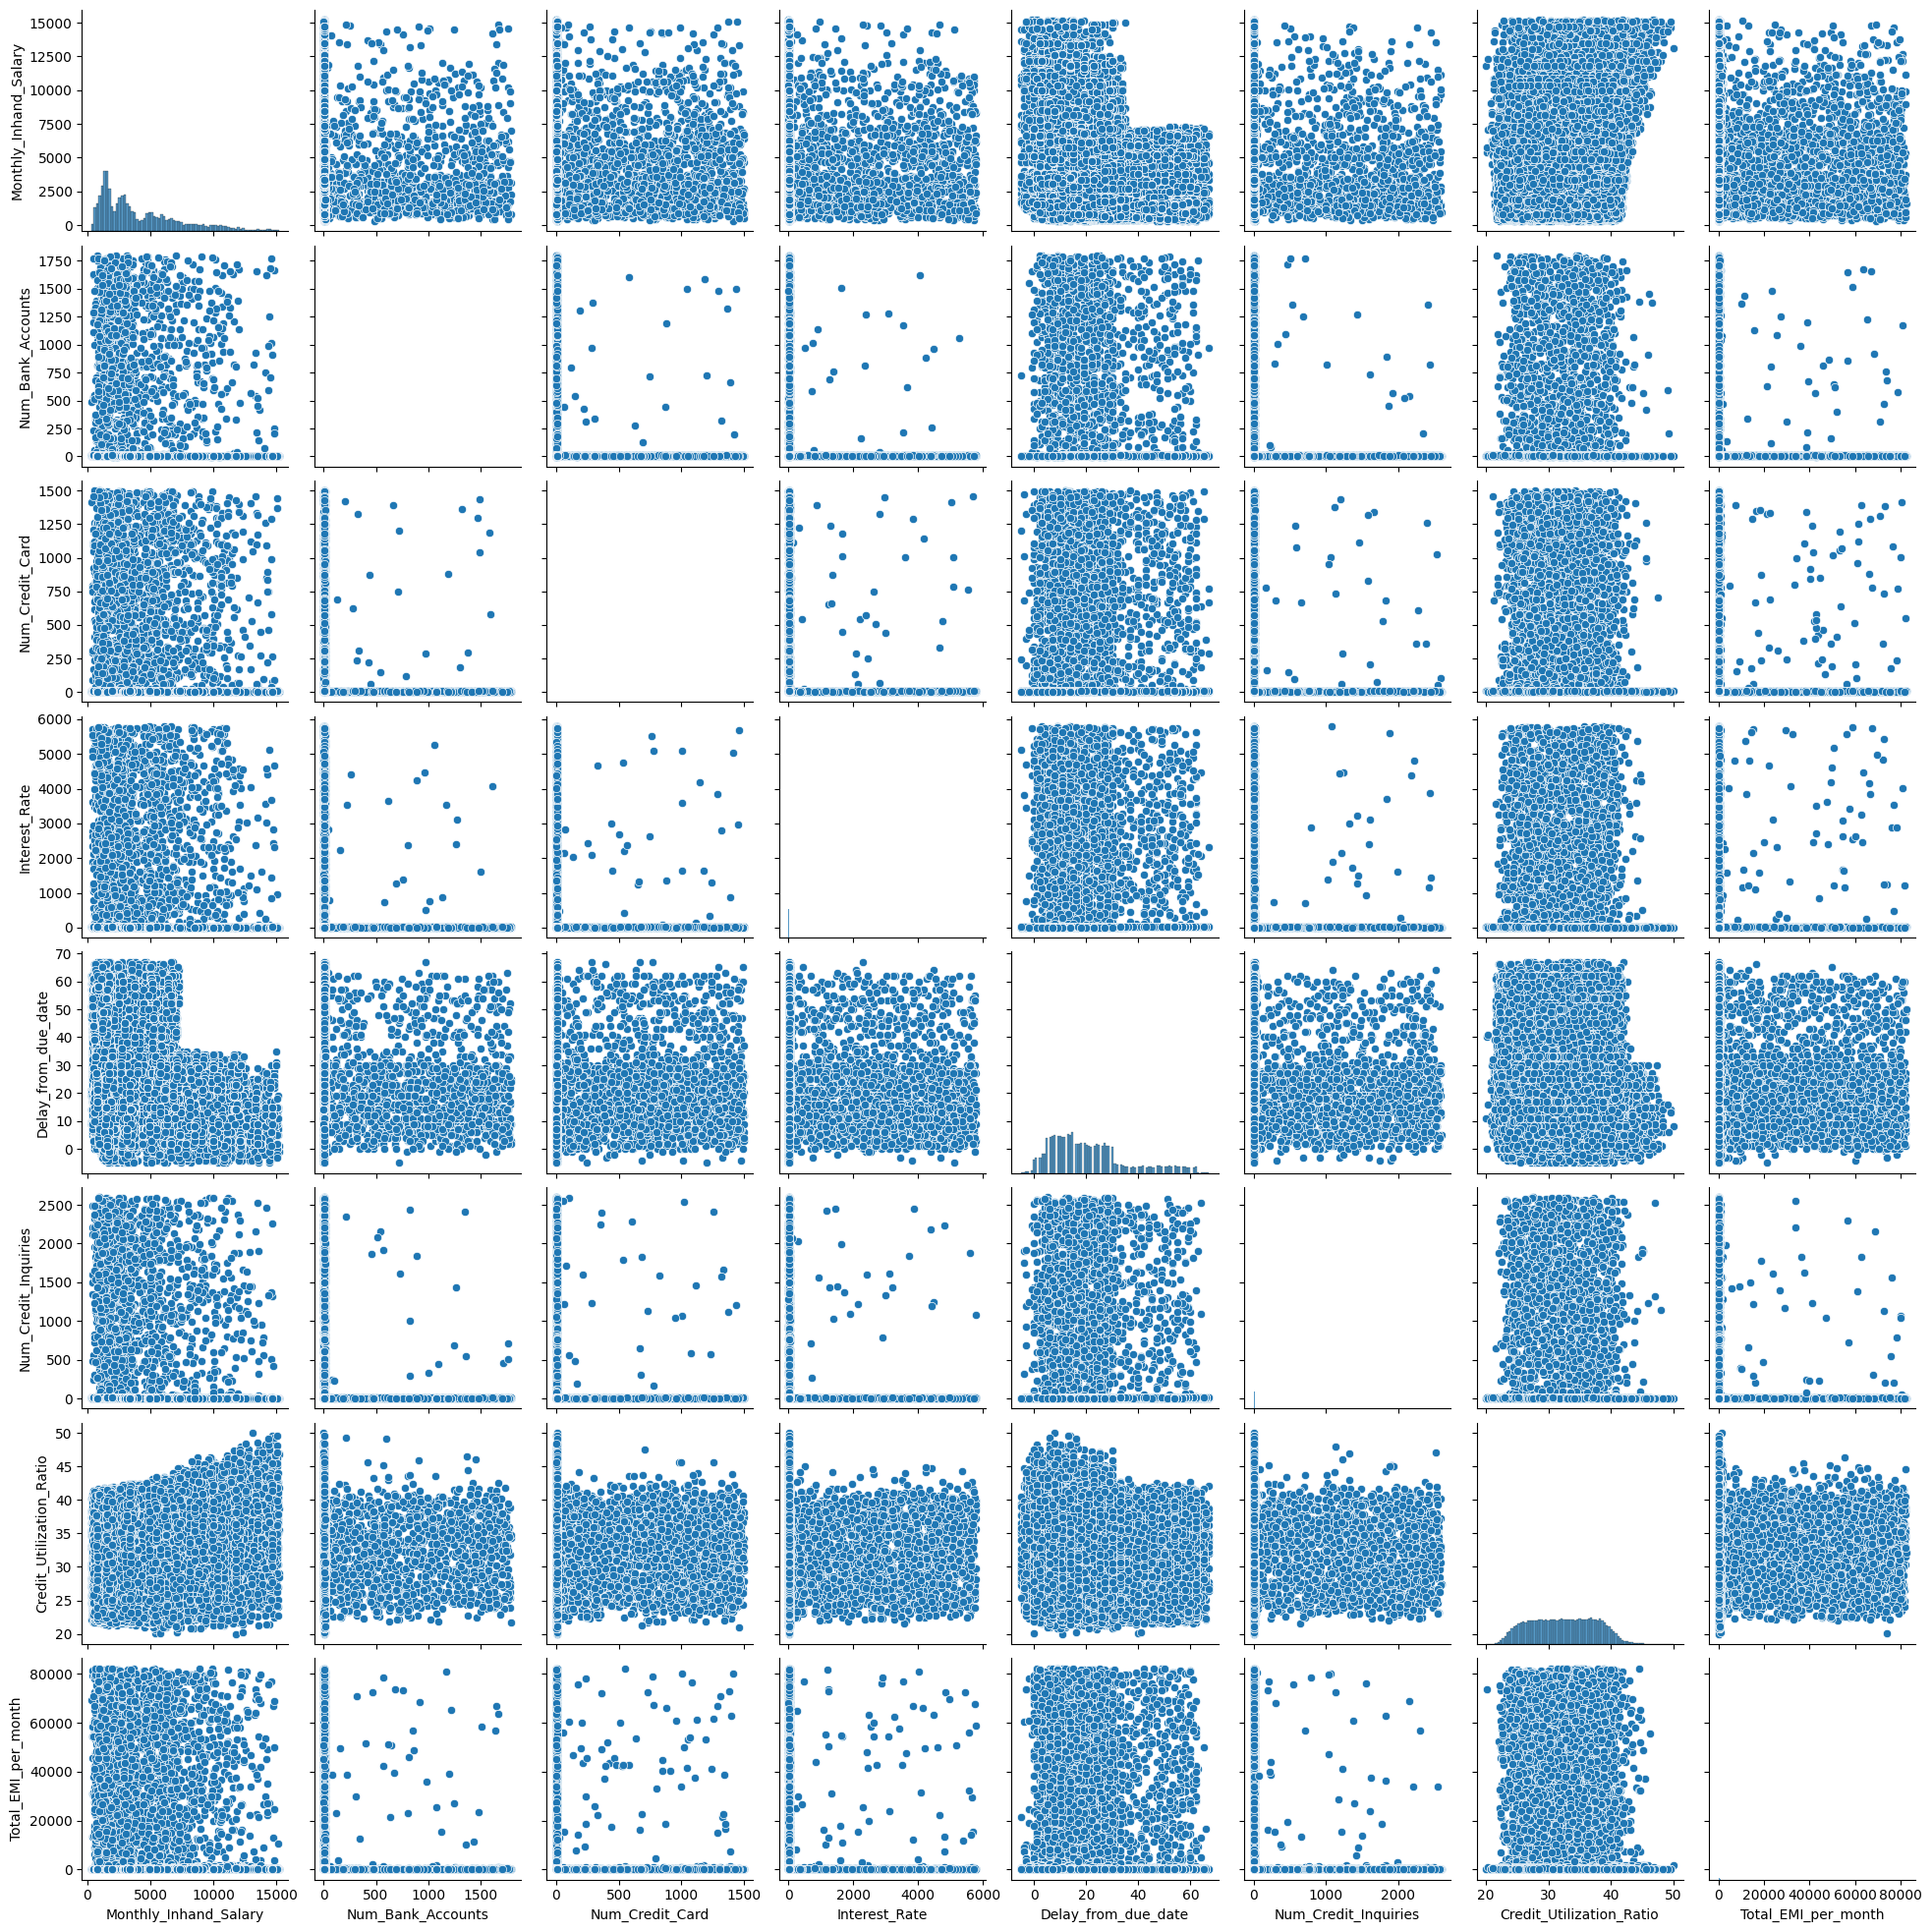

In [9]:
sns.pairplot(train)
plt.show()

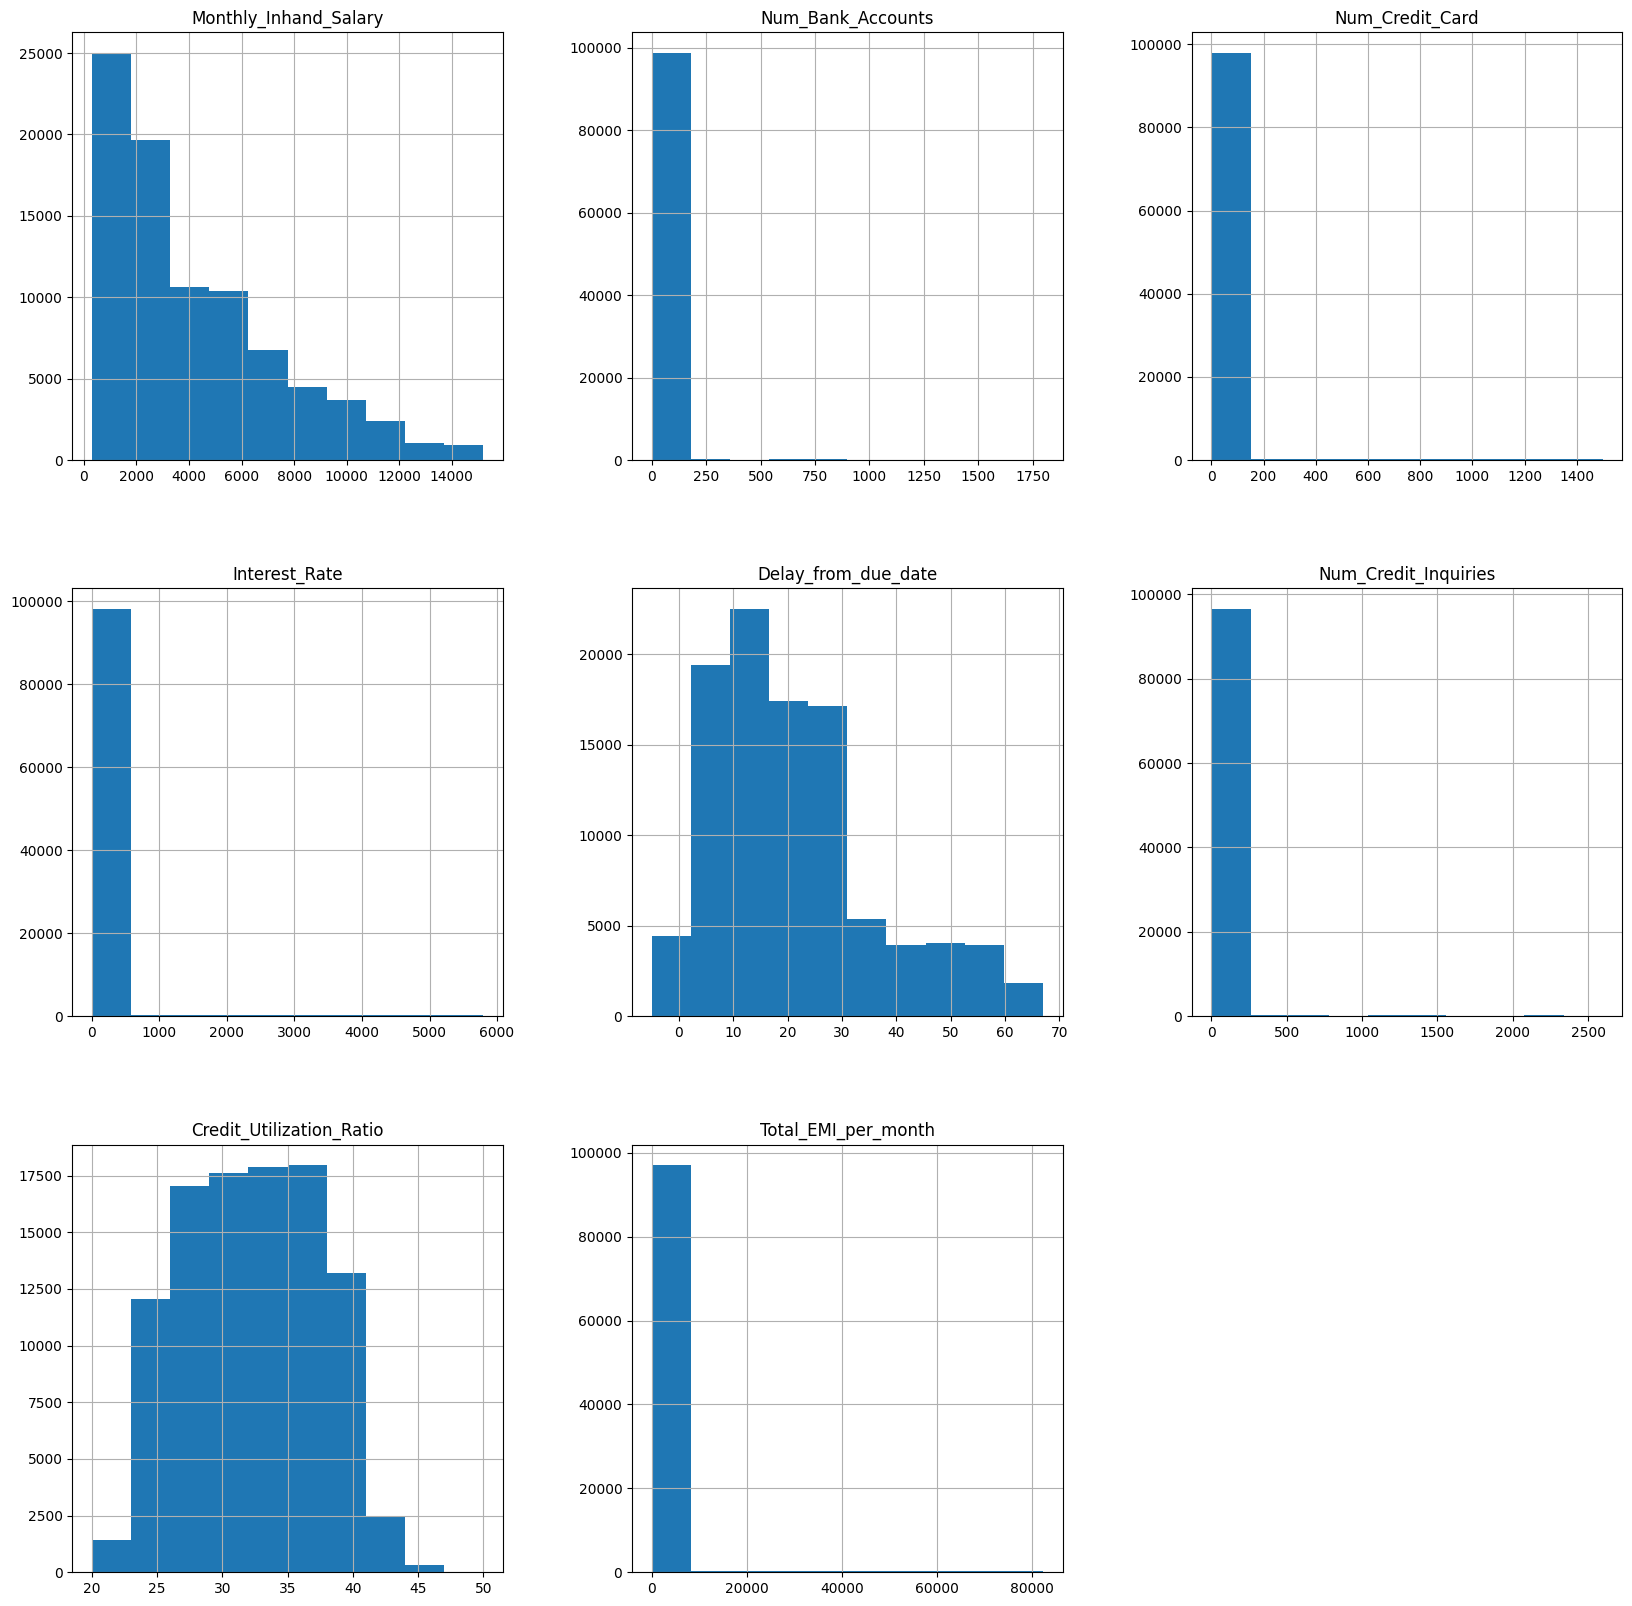

In [10]:
train.hist(figsize=(20, 20))
plt.show()

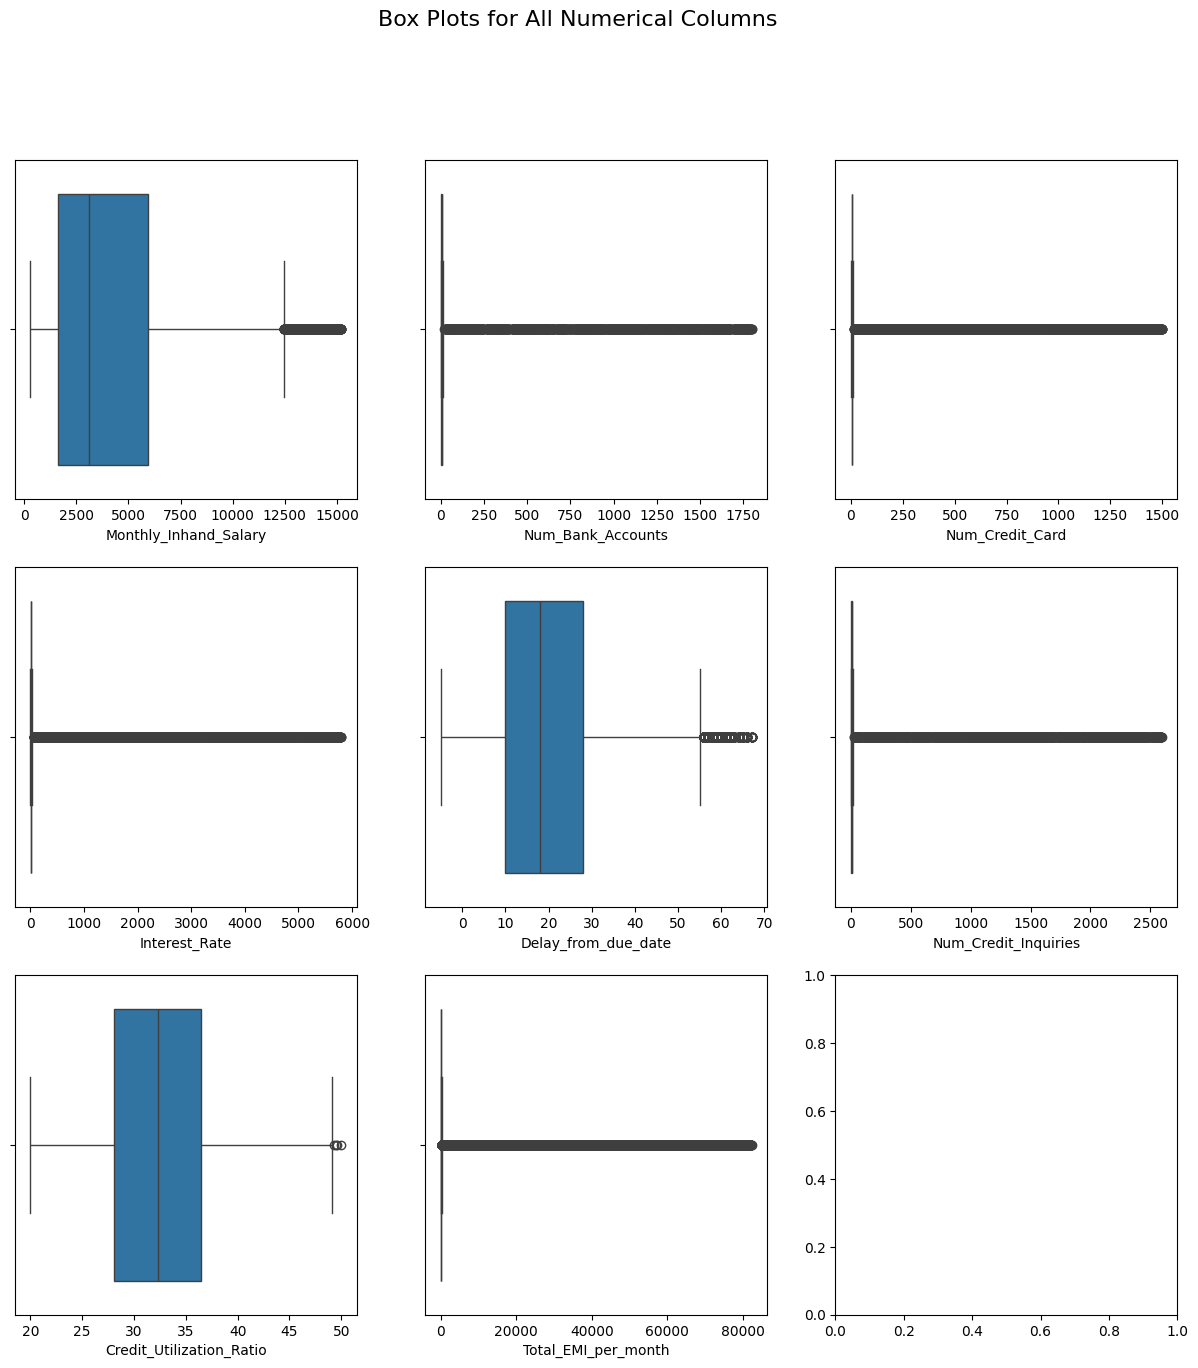

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

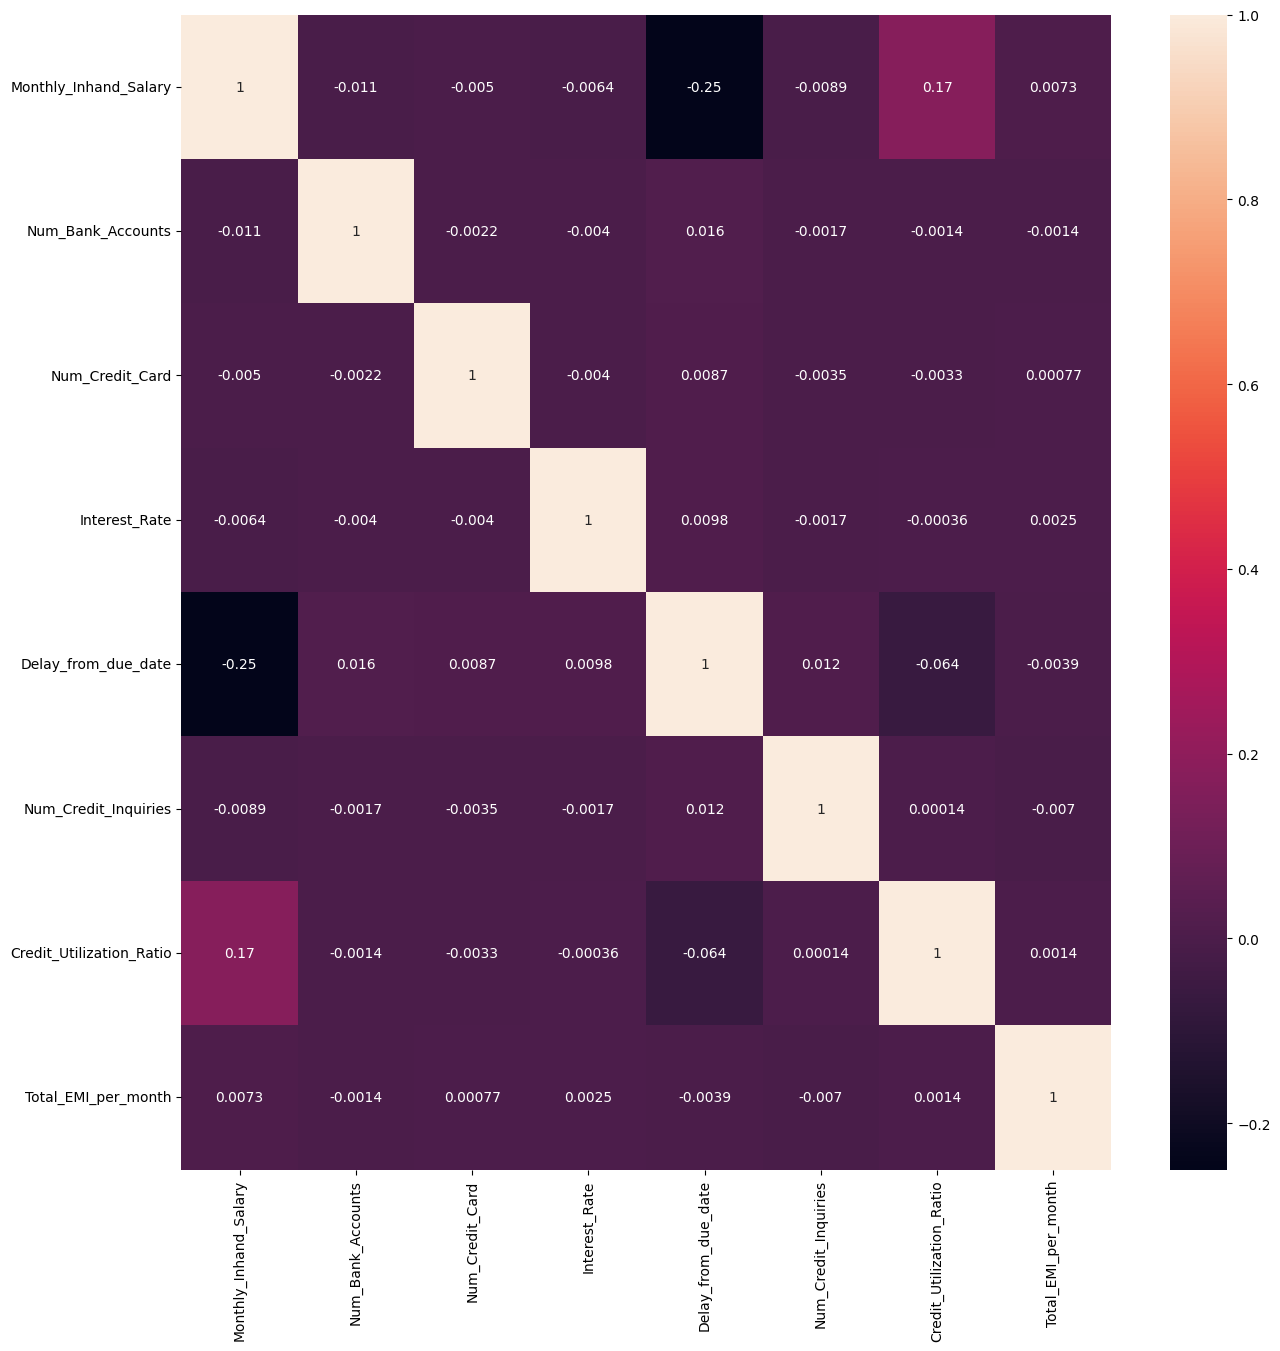

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(),annot=True)
plt.show()

### This graphs before data cleaning and have a lot of outliers and corrupted data

# Data Preparation

In [13]:
train = train.map(lambda x: x.replace('_', '') if isinstance(x, str) else x)

In [14]:
train['Occupation'] = train['Occupation'].replace('_______', np.nan)
train['Payment_Behaviour'] = train['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [15]:
columns_to_convert = [
    'Monthly_Balance', 'Amount_invested_monthly', 'Age',
    'Outstanding_Debt', 'Changed_Credit_Limit', 'Num_of_Loan',
    'Annual_Income','Num_of_Delayed_Payment'
]

for column in columns_to_convert:
    train[column] = pd.to_numeric(train[column], errors='coerce')

In [16]:
columns_to_remove_outliers = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
   'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
   'Amount_invested_monthly','Monthly_Balance'
]

for column in columns_to_remove_outliers:
    Q1 = train[column].quantile(0.15)
    Q3 = train[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[column] = np.where((train[column] < lower_bound) | (train[column] > upper_bound), np.nan, train[column])


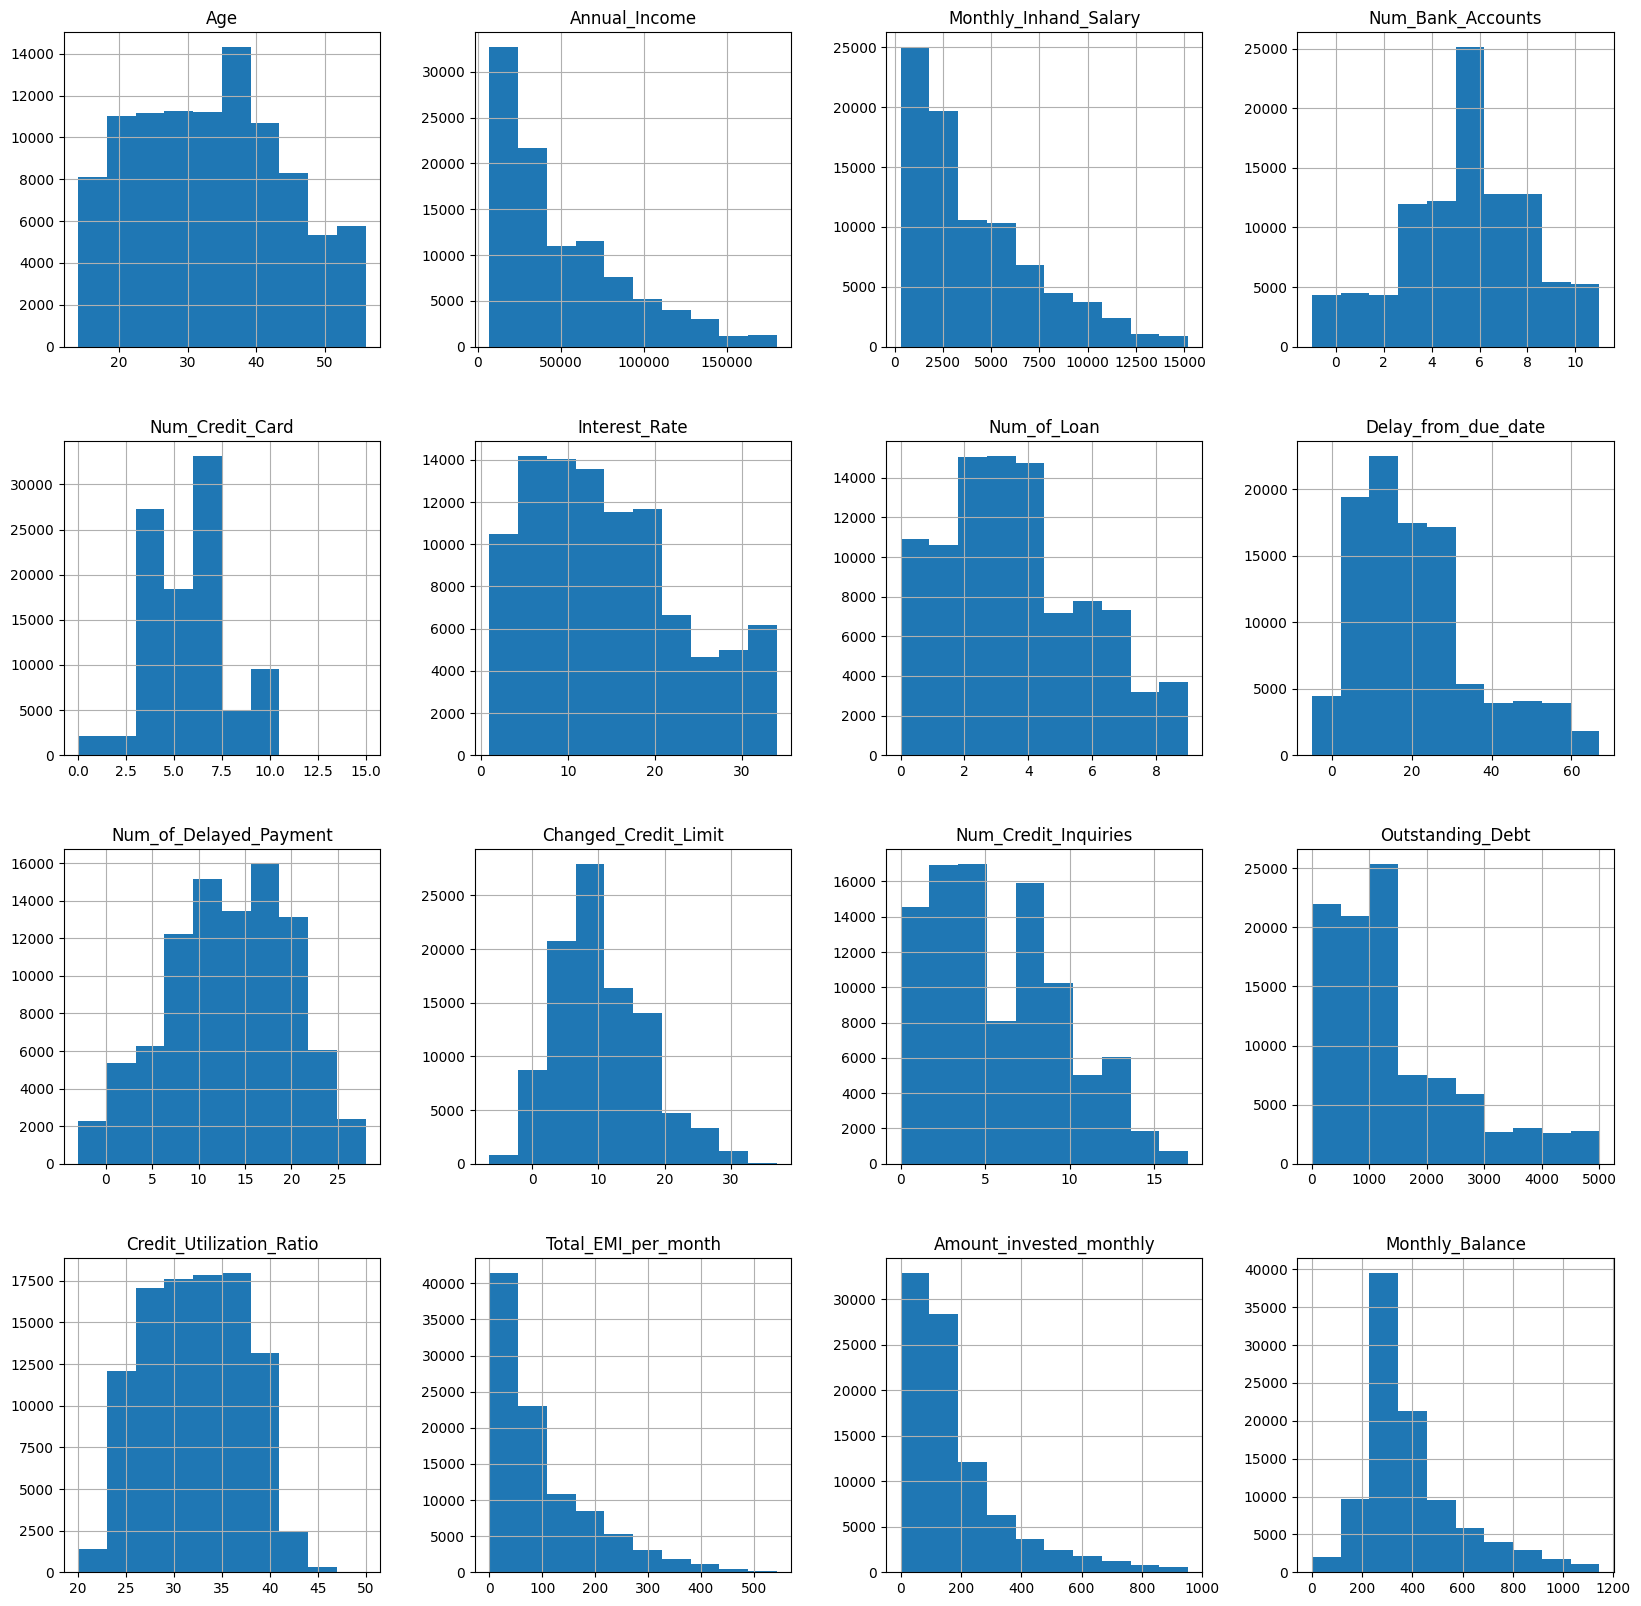

In [17]:
train.hist(figsize=(20, 20))
plt.show()

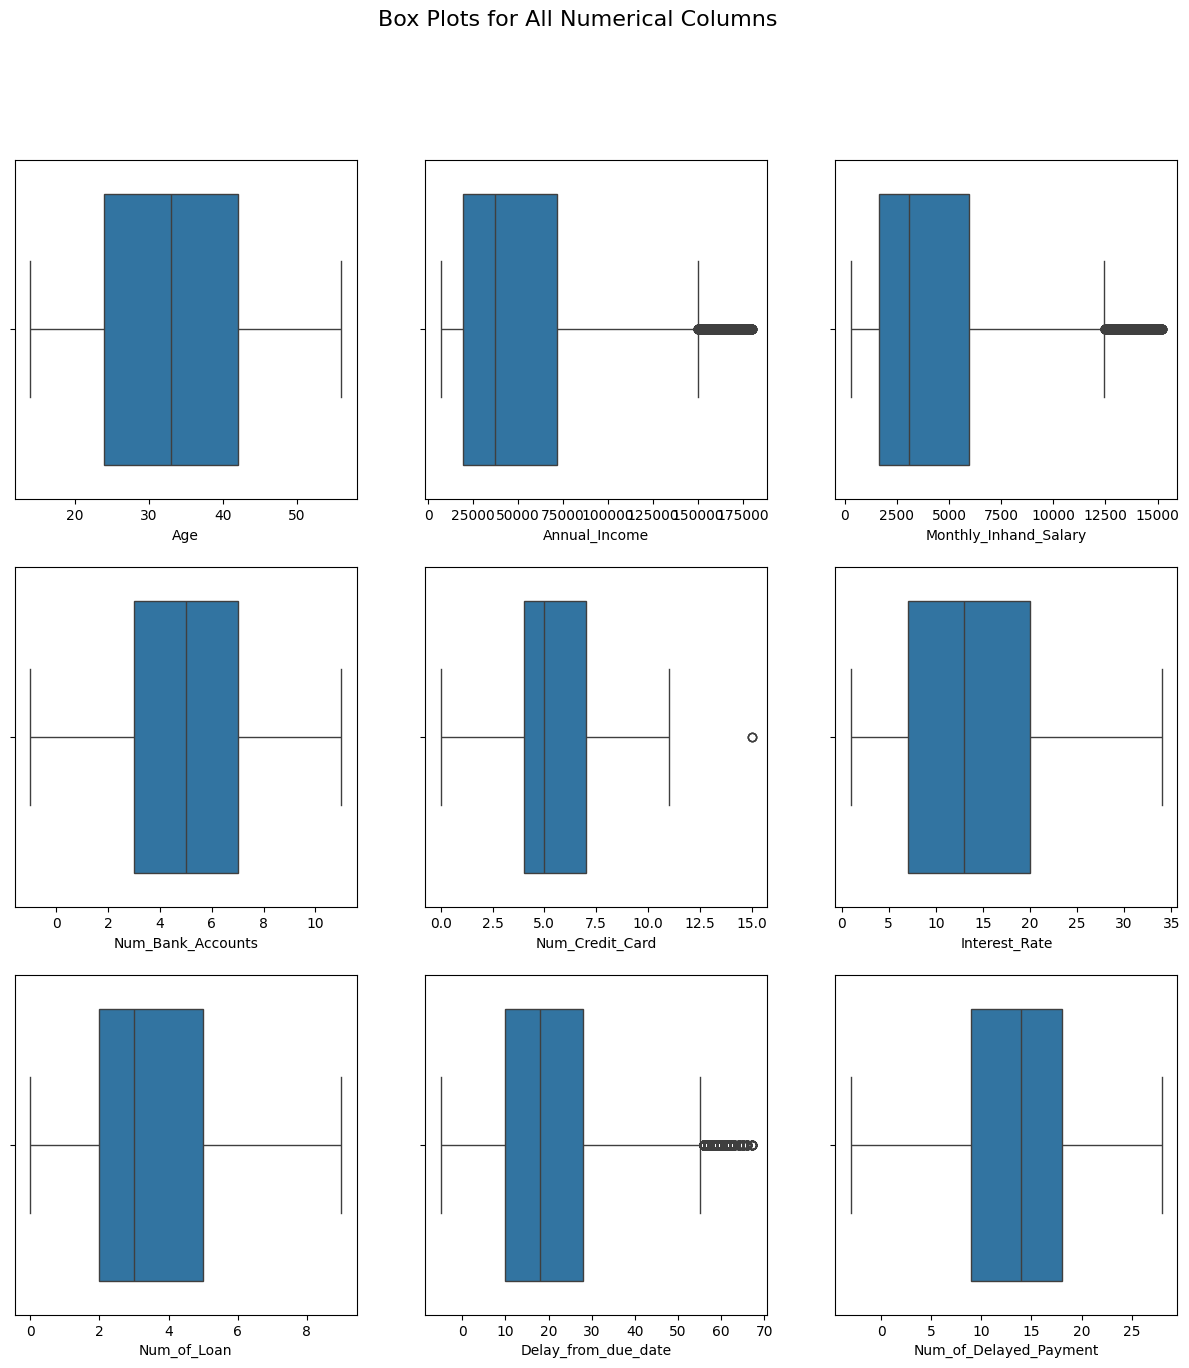

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

numerical_columns = train.select_dtypes(include=[np.number]).columns

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(x=train[column], ax=ax)

plt.show()

In [19]:
train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1, inplace=True)

In [20]:
x = train.drop('Credit_Score', axis=1)
y = train['Credit_Score']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
encoder = OrdinalEncoder()
categorical_columns = ['Type_of_Loan', 'Credit_History_Age', 'Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']

x_train[categorical_columns] = encoder.fit_transform(x_train[categorical_columns])

In [23]:
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)

In [24]:
imputer = KNNImputer()
x_train = imputer.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)

In [25]:
x_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x.columns)

In [27]:
x_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-1.243351,-0.083818,1.326645,1.388030,-1.684511,-1.225877,-1.431264,-0.619769,0.182113,-0.473983,...,-0.458925,0.198461,-0.313507,2.032214,0.167786,-0.579672,0.360530,-0.424497,-0.967701,2.329710
1,-0.777121,-1.380684,1.626728,1.754484,-0.140342,-2.194939,-0.515437,0.198647,-1.241980,-0.608714,...,-1.498718,0.198461,-0.606407,1.525793,0.535608,-0.579672,2.656622,-0.104577,-1.521564,1.478691
2,1.460782,1.213048,-0.588740,-0.641232,-0.140342,0.712247,-0.744393,-0.210561,1.494231,0.469130,...,-0.458925,1.072690,-0.838737,-1.696710,0.388479,-0.579672,1.769658,-0.395324,1.247750,-0.775479
3,0.062093,0.348471,-0.736728,-0.742212,0.631743,0.712247,-0.629915,0.198647,-0.092943,-0.339253,...,-0.718874,-1.549997,-1.087412,-1.015121,0.599976,-0.579672,-0.410981,-0.480532,0.140025,-0.526726
4,-0.497383,0.780759,-0.774955,-0.714434,-1.298469,-1.225877,-0.629915,-1.028978,-1.805300,-1.282366,...,-1.238770,0.198461,-0.599045,-1.188954,0.112612,-2.021014,-0.849947,-0.713706,-0.967701,-0.177820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1.181044,-0.948395,0.821417,0.825363,-0.140342,-0.256815,-1.316786,-0.210561,0.346343,-0.608714,...,-1.238770,0.198461,-1.140022,0.556126,-0.043712,-0.579672,0.855888,1.572684,-0.413838,-0.400676
79996,-1.243351,-1.380684,-0.933167,-0.880136,0.245701,2.165841,0.171434,-0.619769,-1.413101,2.692181,...,1.620660,1.072690,-0.116438,0.251380,-1.193156,0.861670,-0.811364,-0.450356,1.247750,-0.474286
79997,0.435077,0.348471,0.424037,0.506024,-0.912426,0.227716,0.491974,0.198647,1.559693,-0.878174,...,-0.458925,1.072690,-0.711490,1.113686,0.517217,-2.021014,0.800544,1.111745,0.693888,-0.398984
79998,2.020258,-0.732251,-0.816034,-0.726872,-1.684511,0.712247,-1.316786,-0.210561,-0.866433,-0.608714,...,-0.978822,-1.549997,-0.938831,0.887619,-0.834530,-0.579672,-0.610736,-0.083645,0.140025,-0.732466


# Prepare Test Set

In [28]:
x_test[categorical_columns] = encoder.transform(x_test[categorical_columns])

In [29]:
y_test = target_encoder.transform(y_test)

In [30]:
x_test = imputer.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [31]:
x_test.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [32]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x.columns)

In [33]:
x_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.310891,0.348471,-0.189175,-0.157864,-1.684511,-0.256815,-0.515437,-1.438186,0.994880,-0.810809,...,-1.498718,0.198461,0.039211,-0.620537,0.048243,-0.579672,-1.018270,-0.794619,-1.521564,0.803227
1,-1.429843,1.213048,-0.948056,-0.927812,1.017785,0.712247,0.400391,1.017064,0.110909,-0.204522,...,0.840815,-0.675768,2.896317,1.478655,1.754938,0.861670,-0.383312,-0.401301,1.247750,-0.798787
2,0.714815,-0.948395,2.077299,2.133025,-0.140342,-1.710408,-0.400958,-0.619769,0.179242,-1.215001,...,-0.718874,0.198461,-0.197450,-2.100429,-1.009245,-0.579672,1.104732,1.838309,1.247750,1.597454
3,0.155339,0.348471,-0.797643,-0.814055,0.245701,0.227716,2.003089,-0.619769,-0.999080,-0.406618,...,1.360711,1.072690,0.971476,0.026838,-0.540272,0.861670,-0.736571,-0.715782,1.247750,-0.186959
4,-0.590629,-0.732251,1.085896,1.053541,-1.684511,-1.710408,-0.286480,0.198647,1.022787,-1.349731,...,-0.458925,0.198461,-0.531822,1.418713,-0.273601,-0.579672,0.912599,-0.417008,-0.967701,1.524098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.497383,0.780759,0.008070,-0.024861,1.017785,0.712247,-0.744393,0.607855,1.750338,-0.608714,...,0.060971,1.072690,0.858650,0.354535,-1.303503,0.861670,1.169837,0.506411,0.140025,-0.972347
19996,-0.124399,-0.732251,-0.517712,-0.522001,0.631743,-1.225877,-0.629915,0.198647,0.972829,-0.878174,...,-0.198977,1.072690,-0.884999,1.286726,-1.110396,0.861670,-0.011788,-0.690982,-0.967701,-0.299362
19997,0.621569,-1.164540,-0.695800,-0.717169,-0.526384,-1.225877,-0.057523,0.607855,-0.360535,-0.541348,...,1.100763,1.072690,-0.180170,0.349550,-0.437282,0.861670,-0.432506,-0.650881,1.247750,-0.203880
19998,0.341831,-0.516107,-0.403621,0.054087,0.245701,-0.741346,-0.057523,-0.210561,-0.052747,-1.147635,...,-1.498718,1.072690,-0.903873,-0.749483,-0.264405,-0.579672,-0.152817,0.984274,1.247750,-1.200074


# ANN Model Training

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((80000, 22), (80000,), (20000, 22), (20000,))

In [186]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)               │ (None, 512)            │        11,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,915 (730.14 KB)

 Trainable params: 186,915 (730.14 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
model.compile(keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [188]:
print(model.input_shape)

(None, 22)


In [189]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [190]:
train_callback = model.fit(x_train, y_train, batch_size=512, epochs=500, validation_split=0.2, callbacks=[early_stop])

Epoch 1/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5216 - loss: 0.9339 - val_accuracy: 0.6623 - val_loss: 0.7328
Epoch 2/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6445 - loss: 0.7766 - val_accuracy: 0.6835 - val_loss: 0.7043
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6619 - loss: 0.7457 - val_accuracy: 0.6834 - val_loss: 0.6967
Epoch 4/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6719 - loss: 0.7319 - val_accuracy: 0.6884 - val_loss: 0.6861
Epoch 5/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6784 - loss: 0.7198 - val_accuracy: 0.6886 - val_loss: 0.6856
Epoch 6/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6812 - loss: 0.7119 - val_accuracy: 0.6911 - val_loss: 0.6837
Epoch 7/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6840 - loss: 0.7075 - val_accuracy: 0.6936 - val_loss: 0.6753
Epoch 8/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6851 - loss: 0.7030 - 

# Model Evaluation

In [191]:
train_callback.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [192]:
loss, accuracy = model.evaluate(x_train, y_train)
[loss, accuracy]

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8446 - loss: 0.3900


[0.4266778826713562, 0.8270124793052673]

In [193]:
print("Train Accuracy: ",accuracy)

Train Accuracy:  0.8270124793052673


In [194]:
loss, accuracy = model.evaluate(x_test, y_test)
[loss, accuracy]

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7535 - loss: 0.5996


[0.6038274168968201, 0.7510499954223633]

In [195]:
print("Test Accuracy: ",accuracy)

Test Accuracy:  0.7510499954223633


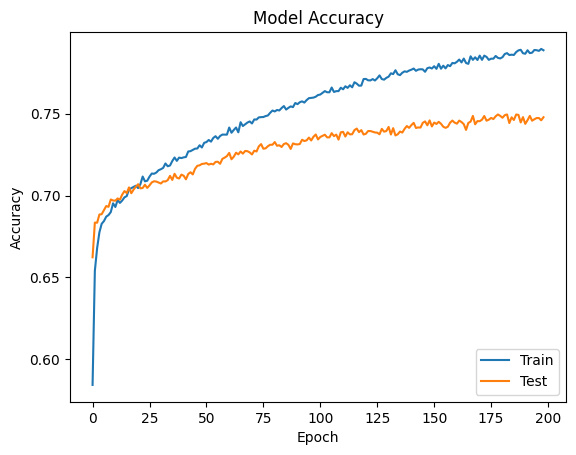

In [196]:
plt.plot(train_callback.history['accuracy'], label='Train')
plt.plot(train_callback.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

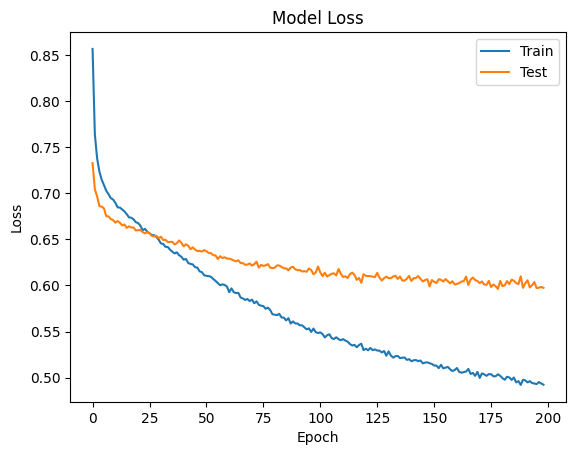

In [197]:
plt.plot(train_callback.history['loss'], label='Train')
plt.plot(train_callback.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$